In [39]:
# Source: https://www.kaggle.com/grosvenpaul/beginners-guide-to-eda-and-random-forest-using-r/notebook

#Libraries needed
library(ggplot2)
library(ggthemes)
library(corrplot)
library(reshape2)
library(dplyr)
library(randomForest)

#Load in our dataset
redwine<-read.csv("winequality-red.csv")

#Create a variable indicating if a wine is good or bad
redwine$good.wine<-ifelse(redwine$quality>6,1,0)

#Let's look at some summary statistics
str(redwine)

'data.frame':	1599 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ good.wine           : num  0 0 0 0 0 0 0 1 1 0 ...


In [40]:
summary(redwine)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

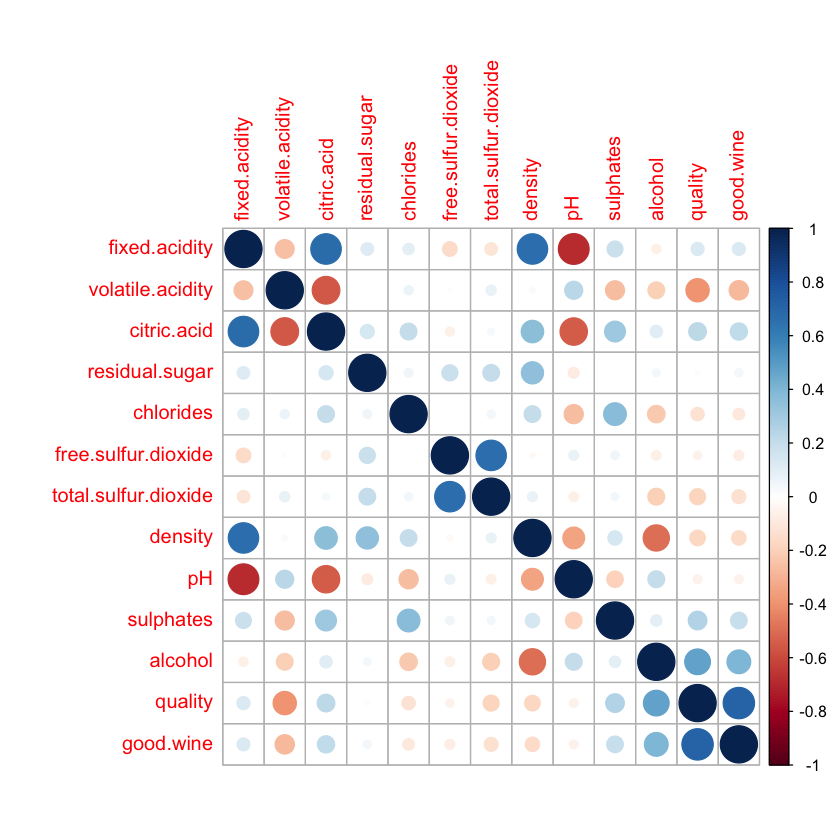

In [41]:
#Correlation Heatmap of Variables
corrplot(cor(redwine))

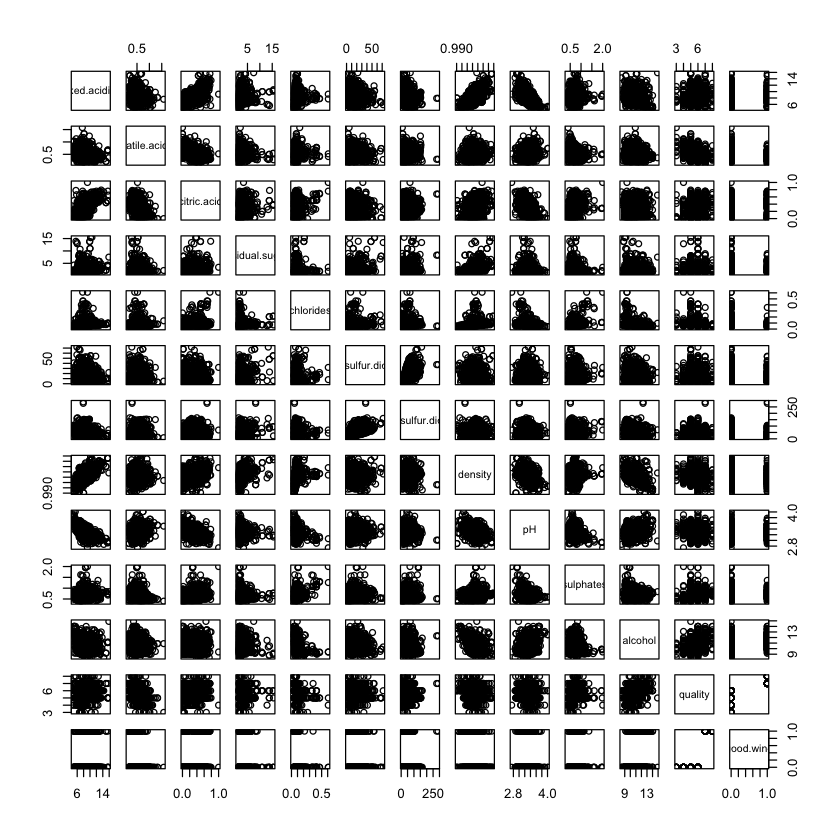

In [42]:
# Exploratory Data Analysis

# Correlation of Variables
#Scatterplot Matrix of Variables
plot(redwine)
# As the heatmap suggests, alcohol has the strongest correlation with wine quality.

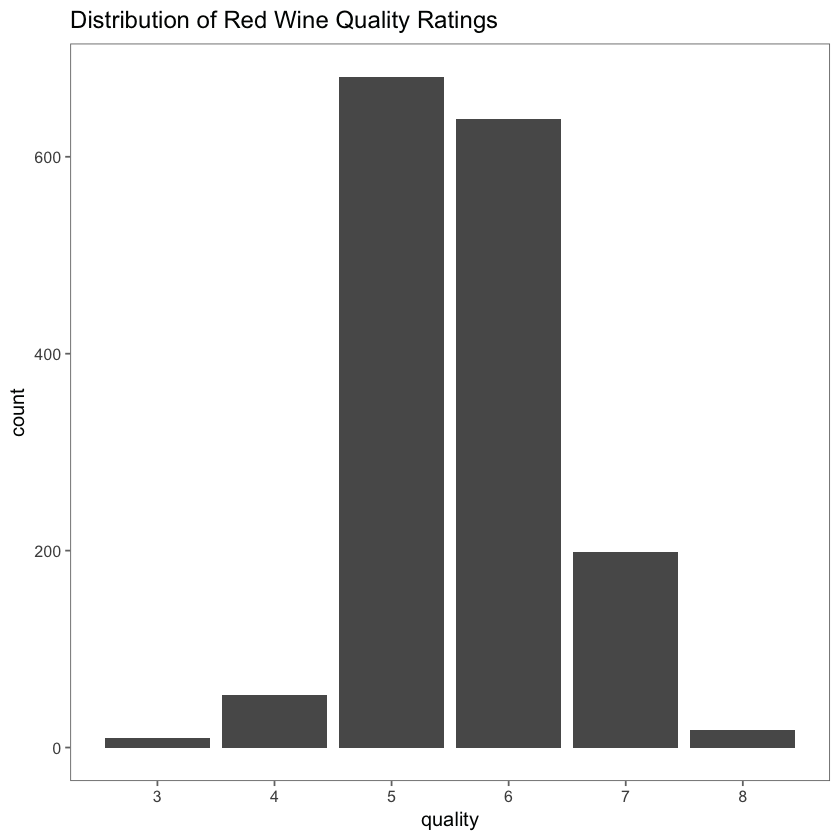

In [43]:
#Distribution of red wine quality ratings
ggplot(redwine,aes(x=quality))+geom_bar(stat = "count",position = "dodge")+
  scale_x_continuous(breaks = seq(3,8,1))+
  ggtitle("Distribution of Red Wine Quality Ratings")+
theme_few()

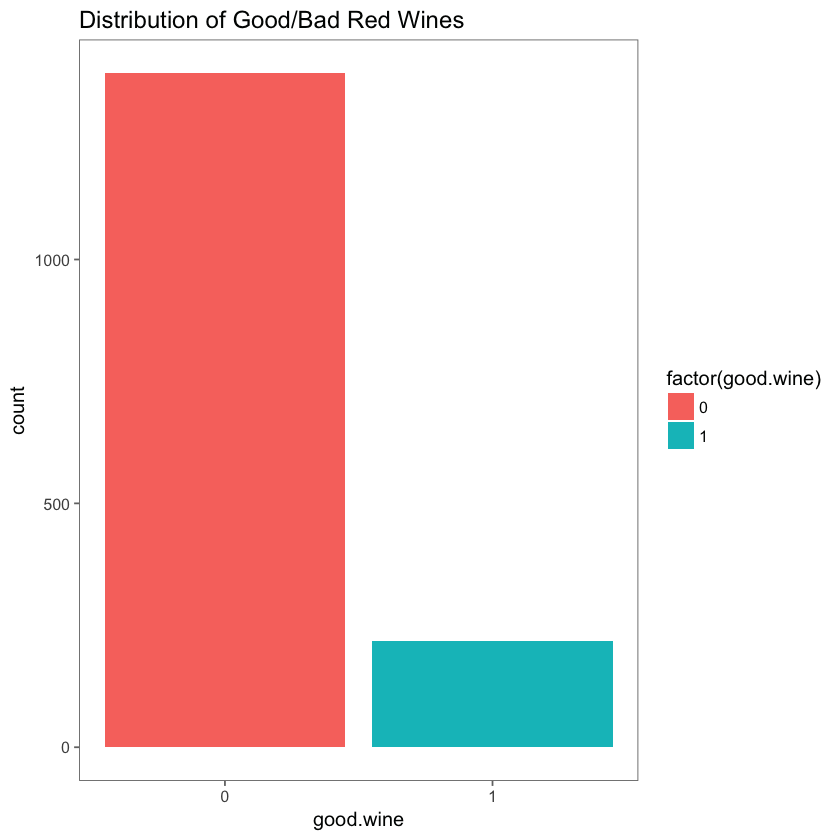

In [44]:
# Wine Quality

#Distribution of good/bad red wines
ggplot(redwine,aes(x=good.wine,fill=factor(good.wine)))+geom_bar(stat = "count",position = "dodge")+
  scale_x_continuous(breaks = seq(0,1,1))+
  ggtitle("Distribution of Good/Bad Red Wines")+
  theme_few()

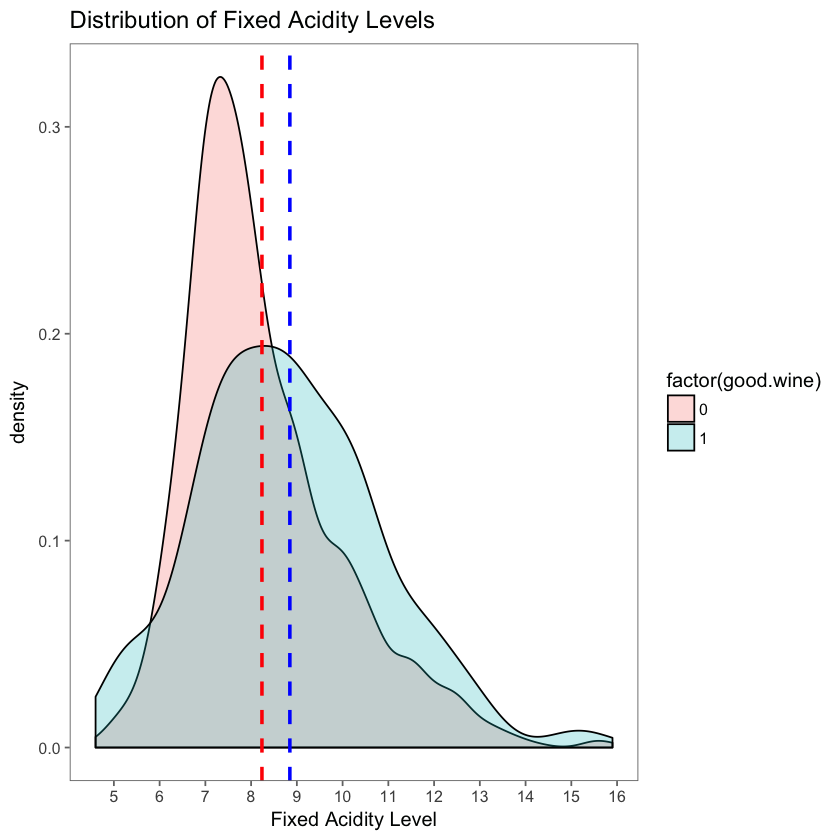

In [45]:
# Physiochemical Properties and Wine Quality

#Fixed Acidity and Wine Quality
ggplot(redwine,aes(x=fixed.acidity,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(fixed.acidity[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(fixed.acidity[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(4,16,1))+
  xlab(label = "Fixed Acidity Level")+
  ggtitle("Distribution of Fixed Acidity Levels")+
  theme_few()

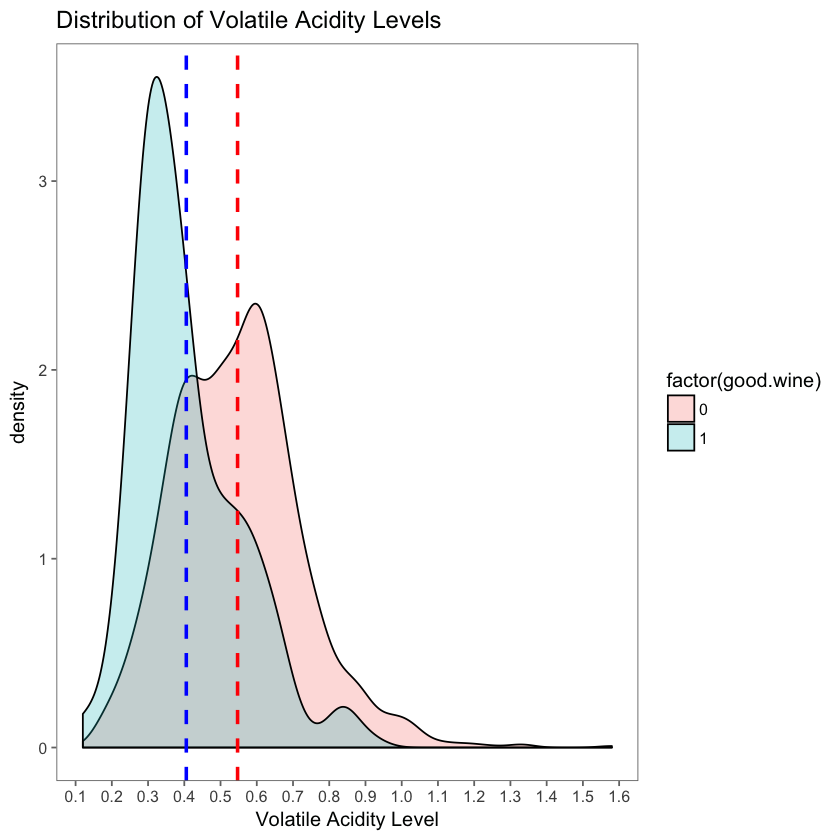

In [46]:

#Volatile Acidity and Wine Quality
ggplot(redwine,aes(x=volatile.acidity,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(volatile.acidity[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(volatile.acidity[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0,1.6,0.1))+
  xlab(label = "Volatile Acidity Level")+
  ggtitle("Distribution of Volatile Acidity Levels")+
  theme_few()


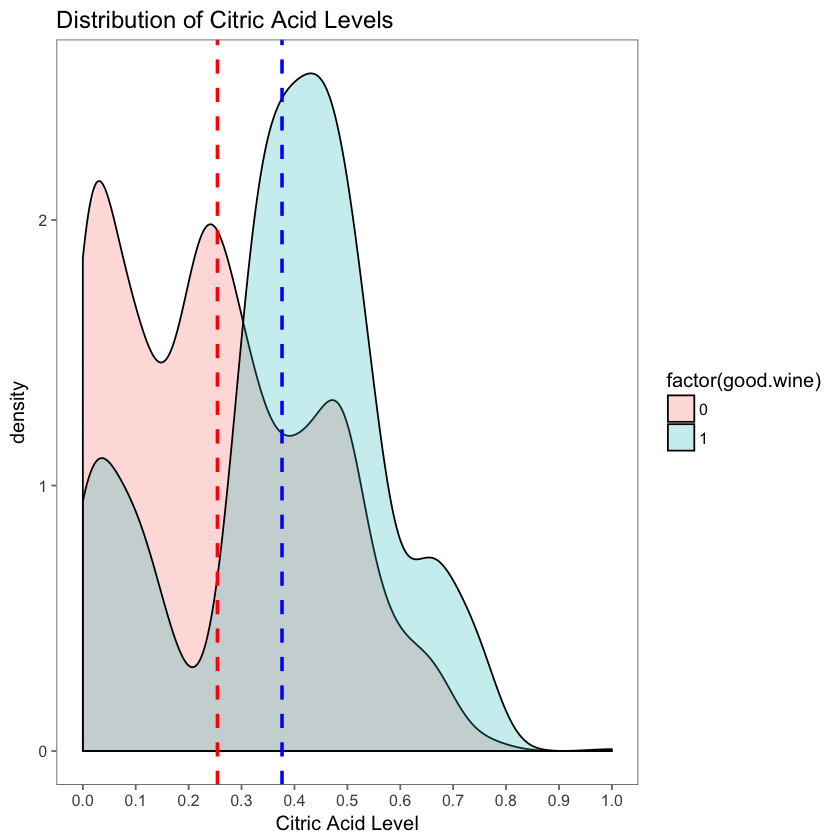

In [47]:
#Citric Acid and Wine Quality
ggplot(redwine,aes(x=citric.acid,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(citric.acid[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(citric.acid[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0,1,0.1))+
  xlab(label = "Citric Acid Level")+
  ggtitle("Distribution of Citric Acid Levels")+
  theme_few()

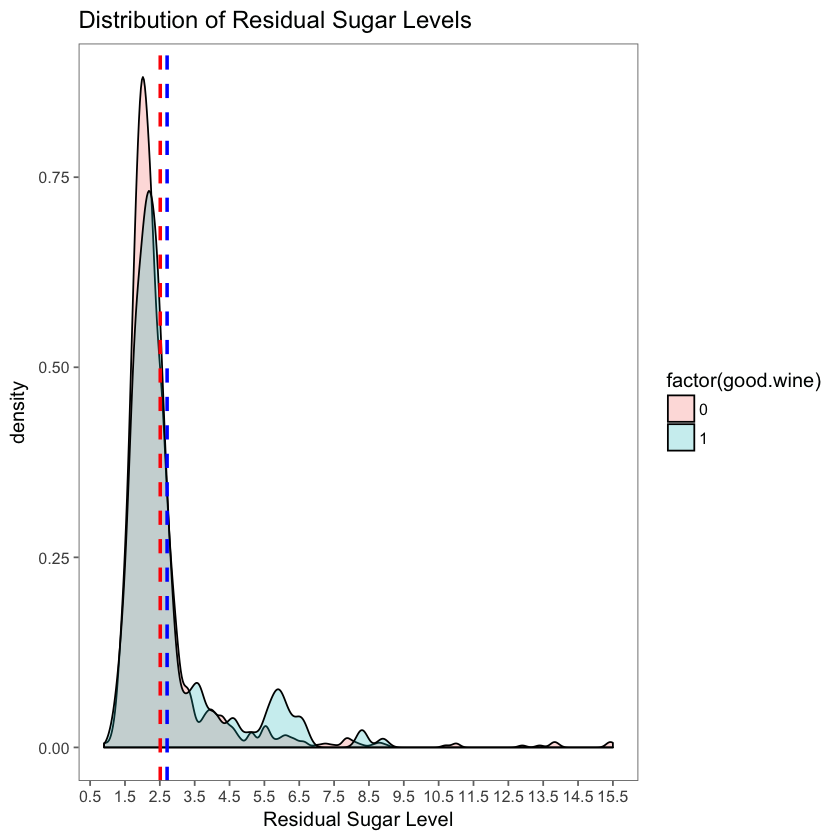

In [48]:

#Residual Sugar and Wine Quality
ggplot(redwine,aes(x=residual.sugar,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(residual.sugar[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(residual.sugar[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0.5,15.5,1))+
  xlab(label = "Residual Sugar Level")+
  ggtitle("Distribution of Residual Sugar Levels")+
  theme_few()

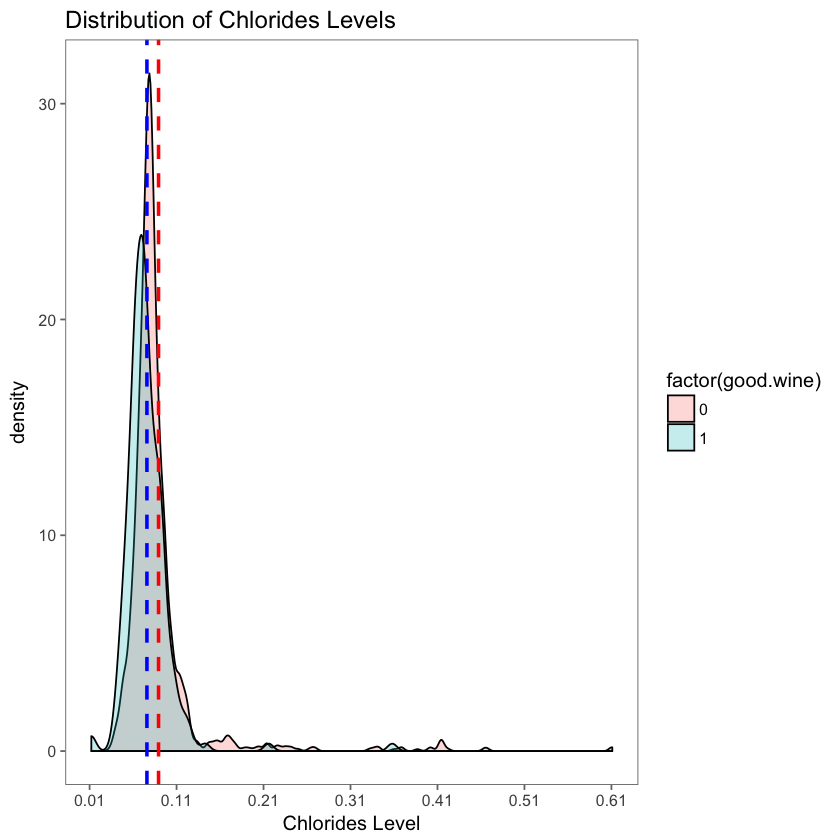

In [49]:
#Chlorides and Wine Quality
ggplot(redwine,aes(x=chlorides,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(chlorides[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(chlorides[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0.01,0.62,0.1))+
  xlab(label = "Chlorides Level")+
  ggtitle("Distribution of Chlorides Levels")+
  theme_few()

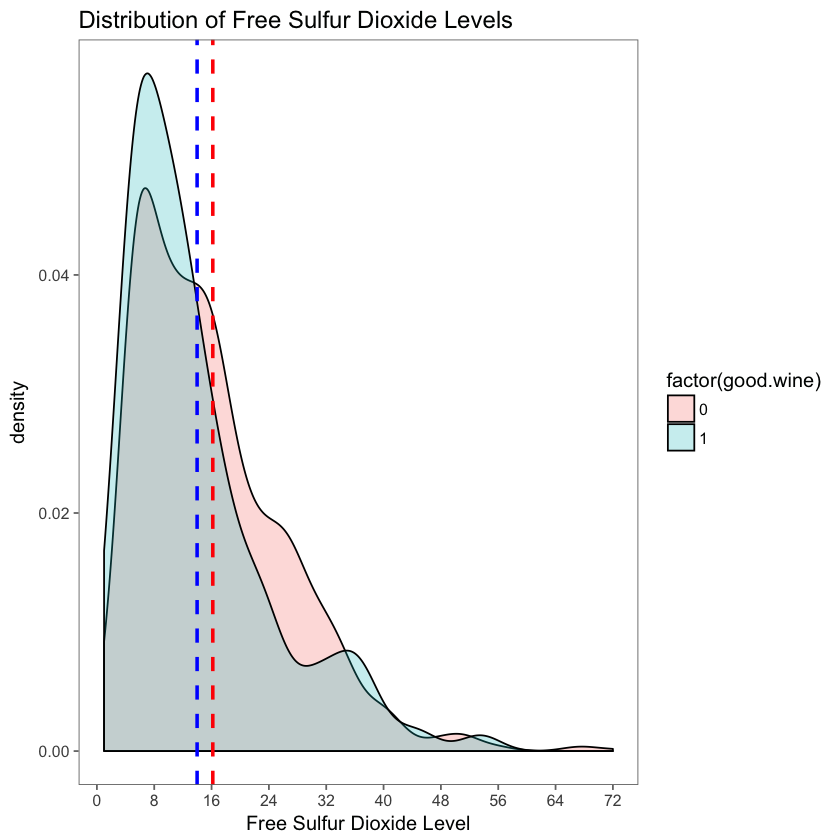

In [50]:
#Free Sulfur Dioxide and Wine Quality
ggplot(redwine,aes(x=free.sulfur.dioxide,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(free.sulfur.dioxide[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(free.sulfur.dioxide[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0,72,8))+
  xlab(label = "Free Sulfur Dioxide Level")+
  ggtitle("Distribution of Free Sulfur Dioxide Levels")+
  theme_few()

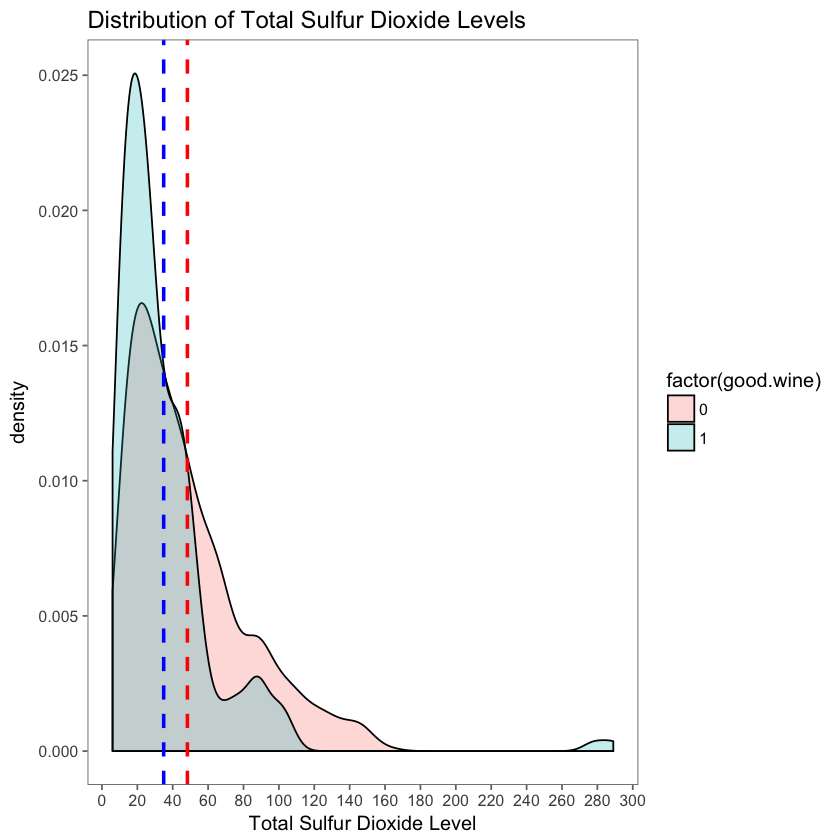

In [51]:
#Total Sulfur Dioxide and Wine Quality
ggplot(redwine,aes(x=total.sulfur.dioxide,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(total.sulfur.dioxide[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(total.sulfur.dioxide[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0,300,20))+
  xlab(label = "Total Sulfur Dioxide Level")+
  ggtitle("Distribution of Total Sulfur Dioxide Levels")+
  theme_few()


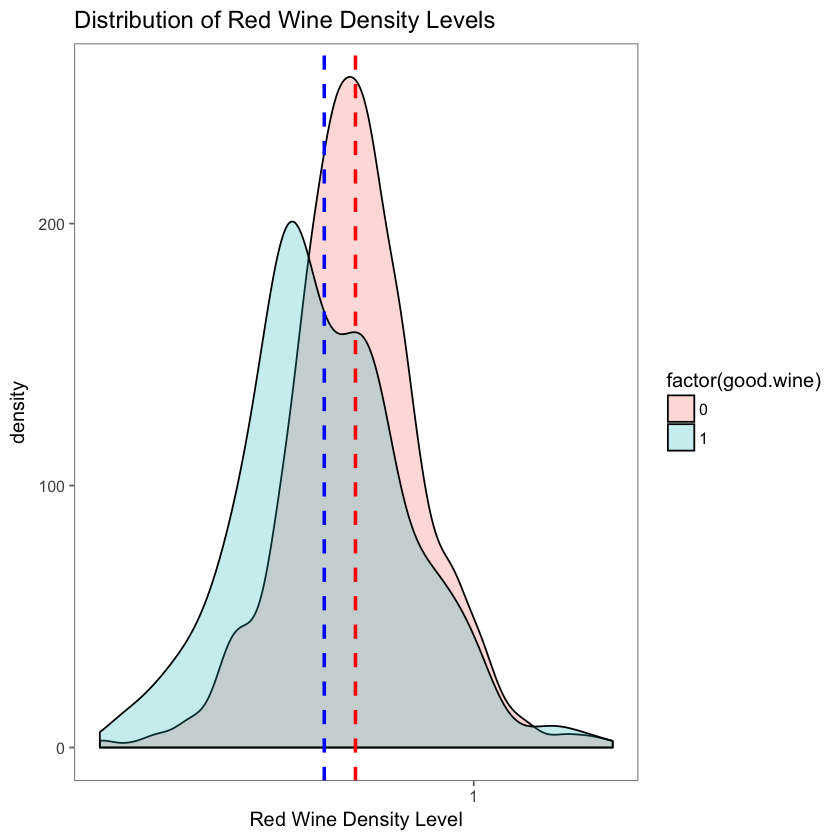

In [52]:

#Density and Wine Quality
ggplot(redwine,aes(x=density,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(density[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(density[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0.8,1.2,0.025))+
  xlab(label = "Red Wine Density Level")+
  ggtitle("Distribution of Red Wine Density Levels")+
  theme_few()


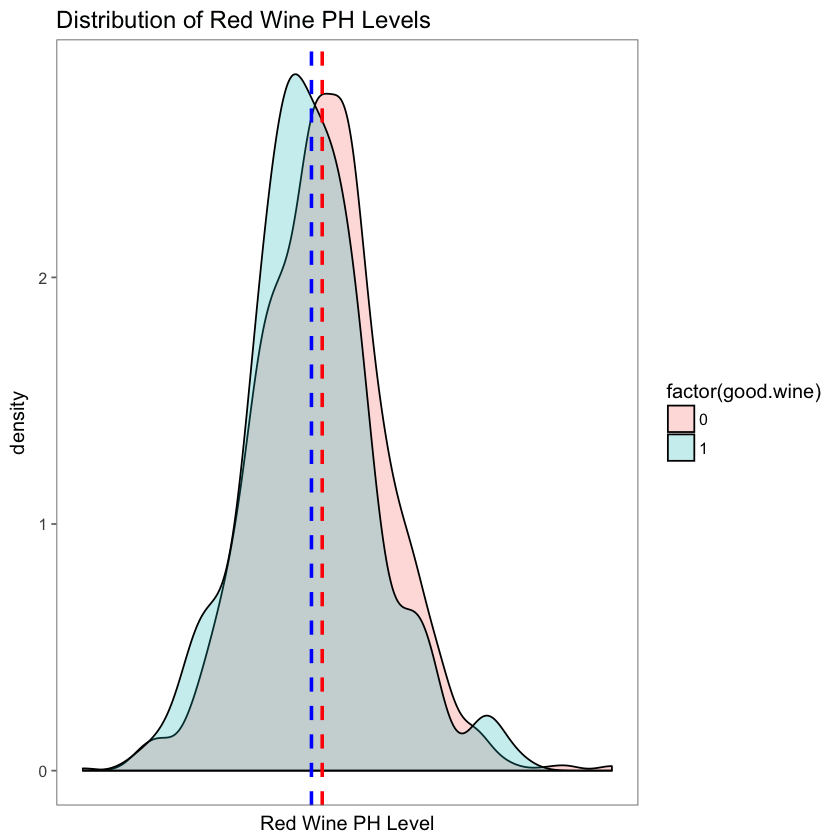

In [53]:

#PH and Wine Quality
ggplot(redwine,aes(x=pH,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(pH[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(pH[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0.8,1.2,0.025))+
  xlab(label = "Red Wine PH Level")+
  ggtitle("Distribution of Red Wine PH Levels")+
  theme_few()


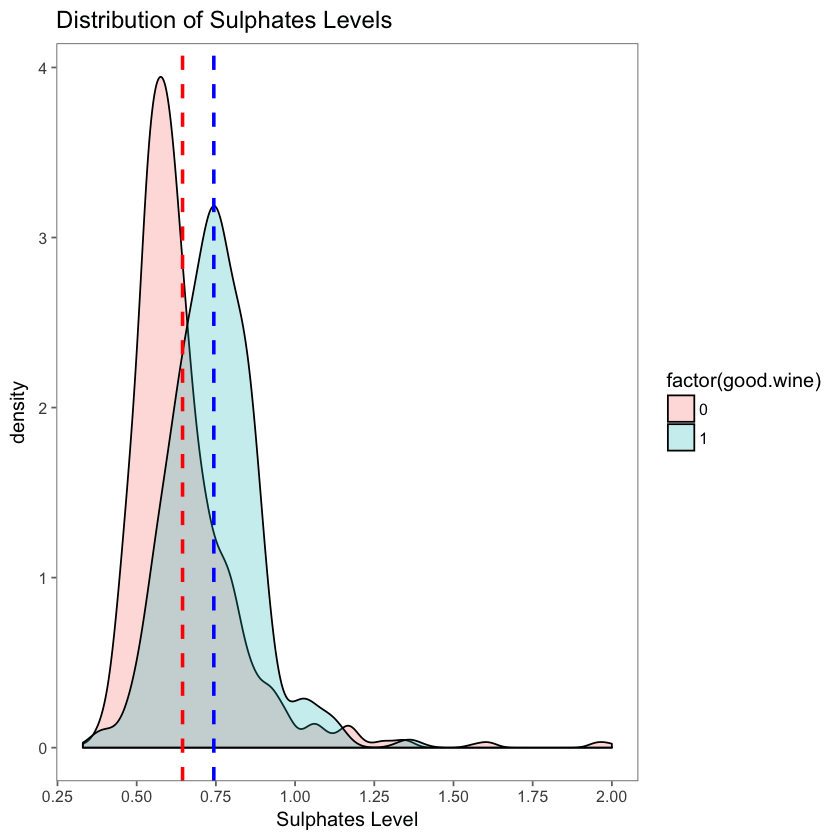

In [54]:

#Sulphates and Wine Quality
ggplot(redwine,aes(x=sulphates,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(sulphates[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(sulphates[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(0,2,0.25))+
  xlab(label = "Sulphates Level")+
  ggtitle("Distribution of Sulphates Levels")+
  theme_few()


In [ ]:
#Alcohol and Wine Quality
ggplot(redwine,aes(x=alcohol,fill=factor(good.wine)))+geom_density(alpha=0.25)+
  geom_vline(aes(xintercept=mean(alcohol[good.wine==0],na.rm=T)),color="red",linetype="dashed",lwd=1)+
  geom_vline(aes(xintercept=mean(alcohol[good.wine==1],na.rm=T)),color="blue",linetype="dashed",lwd=1)+
  scale_x_continuous(breaks = seq(8,15,1))+
  xlab(label = "Alcohol Level")+
  ggtitle("Distribution of Alcohol Levels")+
  theme_few()


In [ ]:
# Predictive Modelling (Binary Classification)

#Baseline Random Forest Model
redwineRF<-randomForest(factor(good.wine)~.-quality,redwine,ntree=150)
redwineRF

# The overall accuracy of our model is pretty good at around 92% overall. 
# However, we could clearly see that it is much better in predicting bad wines than good ones.



In [ ]:
# Variable Importance

# Get importance
importance    <- importance(redwineRF)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'MeanDecreaseGini'],2))

# Create a rank variable based on importance
rankImportance <- varImportance %>%
  mutate(Rank = paste0('#',dense_rank(desc(Importance))))

# Use ggplot2 to visualize the relative importance of variables
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
                           y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
            hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip() + 
  theme_few()

In [ ]:
# Aha! The results of our Random Forest Model coincides nicely with our previous observation from the 
#density plots that alcohol and sulphates level are the most discriminating factor of wine quality.

